# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [12]:
numerobinario = "1000011100001"

def myint(numerobinario):
    numero_decimal = 0
# esta funcion recibe un valor en str el cual es el numero binario 
    # y en una funcion de for recorre la lista y segun la posicion del uno eleva a la potencia y se suma todo en numero_decimal
    for posicion, digito in enumerate(numerobinario[::-1]):
        numero_decimal += int(digito)*2**posicion
    return numero_decimal

numero_decimal = myint(numerobinario)
print("El número decimal es:", numero_decimal, int(0b1000011100001))

El número decimal es: 4321 4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [11]:
def numero64(bin):
    """
    resive un str de 64 bits de numero binario para despues separarlo
    el primero como el signo
    luego los otros 12 como exponente
    y el resto como la matisa
    una vez separado el stream entre esos tres valores se realiza el procedimiento dpara convertirlos
    """
    if len(bin) != 64:
        raise ValueError("La cadena debe tener exactamente 64 bits.")

    S = int(bin[0])                  # Signo
    E = int(bin[1:12], 2)            # Exponente en binario -> decimal
    M = bin[12:]                     # Mantisa como cadena de bits

    # Casos especiales: infinito o NaN
    if E == 2047:
        if '1' in M:
            return float('None')
        else:
            return float('inf') if S == 0 else float('-inf')

    # Normalizado
    mantisa = 1.0  # el bit implícito
    for i in range(52):
        bit = int(M[i])
        mantisa += bit * 2 ** -(i + 1)

    exponente = E - 1023
    resultado = (-1) ** S * mantisa * 2 ** exponente
    return resultado
binario = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = numero64(binario)

print("El numero binario y decimal es:",binario , resultado)


El numero binario y decimal es: 0100000000111011100100001111111111111111111111111111111111111111 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.
 
 

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
def arctan(x, tol):
    tan = 0
    i = 1
    while True:
        termino = (-1)**(i+1) * x**(2*i-1) / (2*i-1)
        tan += termino
        if abs(4*tan - math.pi) < tol:
            return tan, i, tol
        i += 1

arctan(1,1e-4)

(0.7853731633975086, 10000, 0.0001)

# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

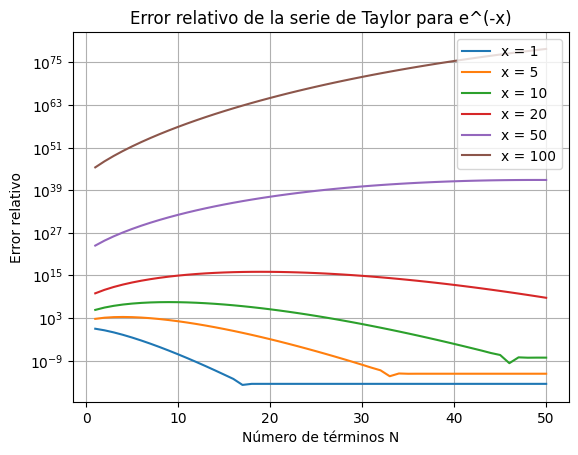

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


def serie_exp_n(x, N):
    '''
    Intercambiamos al funcion exponencial por su representacion en serie de taylor de esa manera lo representamos de manera mas facil
    guardando el valor en la variable suma y retornandola
    '''
    suma = 0
    for n in range(N + 1):
        termino = ((-1)**n) * (x**n) / math.factorial(n)
        suma += termino
    return suma


def error_r(valor_aproximado, valor_real):
    '''
    evalua el valor entre el aproximado y el real
    '''
    return abs(valor_aproximado - valor_real) / abs(valor_real)


valores_x = [1, 5, 10, 20, 50, 100]
N_max = 50
    '''
    se genera un for para generar el error de cada uno y asi poder graficarlo
    '''
for x in valores_x:
    errores = []
    Ns = list(range(1, N_max + 1))

    for N in Ns:
        aproximado = serie_exp_n(x, N)
        exacto = np.exp(-x)
        error = error_r(aproximado, exacto)
        errores.append(error)

    plt.plot(Ns, errores, label=f"x = {x}")

plt.yscale("log")
plt.xlabel("Número de términos N")
plt.ylabel("Error relativo")
plt.title("Error relativo de la serie de Taylor para e^(-x)")
plt.legend()
plt.grid()
plt.show()


# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [1]:
import numpy as np
import math
# una funcion cualquiera para evaluar
fx = lambda x: np.sin(x)
# la funcion derivada
df = lambda x: np.cos(x)
#aqui aplicamos la definicion
df_numerica = lambda x,h: fx(x + h) - fx(x) / h

# Punto en el que vamos a evaluar
x0 = math.pi / 4

# Diferentes valores de h
h_valores = [1e-1, 1e-3, 1e-6, 1e-9, 1e-12]

# Imprimimos resultados
print(f"Derivada de f(x) = sin(x) en x = {x0:.5f} (pi/4):\n")
print(f"{'h':>10} | {'Numérica':>15} | {'Exacta':>15} | {'Error absoluto':>18}")
for h in h_valores:
    approx = df_numerica(x0, h)
    exact = df(x0)
    error = abs(approx - exact)
    print(f"{h:10.1e} | {approx:15.10f} | {exact:15.10f} | {error:18.10e}")

Derivada de f(x) = sin(x) en x = 0.78540 (pi/4):

         h |        Numérica |          Exacta |     Error absoluto
   1.0e-01 |   -6.2969007334 |    0.7071067812 |   7.0040075146e+00
   1.0e-03 | -706.3989676523 |    0.7071067812 |   7.0710607443e+02
   1.0e-06 | -707106.0740790592 |    0.7071067812 |   7.0710678119e+05
   1.0e-09 | -707106780.4794405699 |    0.7071067812 |   7.0710678119e+08
   1.0e-12 | -707106781185.8403320312 |    0.7071067812 |   7.0710678119e+11
